In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering as ac
from scipy.cluster.hierarchy import dendrogram

In [2]:
data = pd.read_csv('D:/FDEC/courses/iris.csv')

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
original = data.copy()

In [5]:
data.drop('variety', axis = 1, inplace=True)

In [6]:
target = original.variety

In [7]:
X=data.values
y=target.values

### K-means:

In [8]:
km_3=KMeans(n_clusters=3, random_state=42)

In [9]:
y_pred = km_3.fit_predict(data)

In [10]:
#Sum of squared distances of samples to their closest cluster center
km_3.inertia_

78.851441426146

In [11]:
km_3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Here we see the 3 first lines of the array, the observations are in the same cluster of '1', but just after it the second cluster of '0' but we find some incorrelcty clustered instances in another cluster '2', but in the final lines, we see some points that are not really in the same cluster, ones refers to cluster of 0 and the other of cluster of 0. We can can encode the labels and see the predicted lables using kmeans.

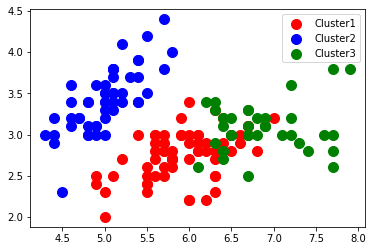

In [12]:
plt.scatter(X[y_pred == 0,0], X[y_pred==0,1], s=100, c='red',label = 'Cluster1')
plt.scatter(X[y_pred == 1,0], X[y_pred==1,1], s=100, c='blue',label = 'Cluster2')
plt.scatter(X[y_pred == 2,0], X[y_pred==2,1], s=100, c='green',label = 'Cluster3')
plt.legend()

In [13]:
y_trs = LabelEncoder().fit_transform(y)

In [14]:
mean_squared_error(y_pred, y_trs)

1.04

As we see, the error is big and that is explained by the figure above that some observations are not well clustered(green and red) but the blue cluster is clear and the points are well clustered. Let's normalize and see if the results will change.

In [15]:
trs_data = StandardScaler().fit_transform(X)

In [16]:
km = KMeans(n_clusters=3, random_state=0)

In [17]:
y_pr = km.fit_predict(trs_data)

In [18]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

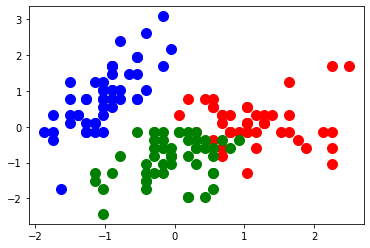

In [19]:
plt.scatter(trs_data[y_pr == 0,0], trs_data[y_pr==0,1], s=100, c='red',label = 'Cluster1')
plt.scatter(trs_data[y_pr == 1,0], trs_data[y_pr==1,1], s=100, c='blue',label = 'Cluster2')
plt.scatter(trs_data[y_pr == 2,0], trs_data[y_pr==2,1], s=100, c='green',label = 'Cluster3')

We see that even we normalize, the same results we obtain but only the scale changes.

In [20]:
#Sum of squared distances of samples to their closest cluster center:
km.inertia_

139.82049635974968

In [21]:
mean_squared_error(y_pr, y_trs)

1.6266666666666667

The error get bigger here, so the normalization just worsen our model.

### Hierarchical Clustering

In [22]:
cls = ac(n_clusters=3)

In [23]:
y_predi = cls.fit_predict(X)

In [24]:
import numpy as np

In [25]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [26]:
model = ac(distance_threshold=0, n_clusters=None)

In [27]:
model = model.fit(X)

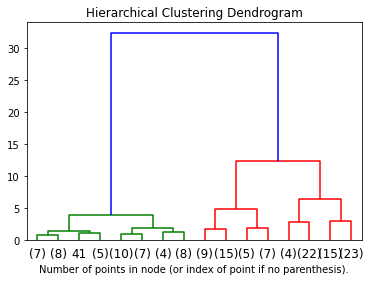

In [28]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

We see clearly that we can cluster the data into 2 clusters(red and green) and that the green points are clustered faster than red points, and we can choose the threshold at level 8 (between 5 and 10) and consider 3 clusters since at that level we see that points of index (9, 15, 5 and 7) form a cluster and the points of index(4, 22,15,23) form another cluster.

Let's calculate the performance of this algorithm using 3 clusters:

In [29]:
model1 = ac(n_clusters=3)

In [30]:
y_prd = model1.fit_predict(X)

In [31]:
mean_squared_error(y_prd, y_trs)

1.0666666666666667

We see that the error 1.06 is small too but not better than kmeans that has error of 1.04.

### DBSCAN

In [32]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [33]:
## Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

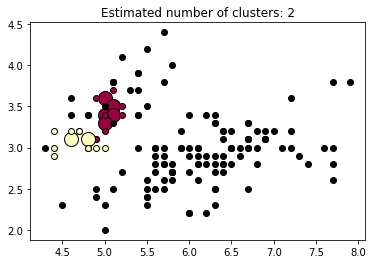

In [34]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [35]:
y_p = db.fit_predict(X)

In [36]:
mean_squared_error(y_p, y_trs)

4.546666666666667

The error using DBSCAN is big and it is clear from the figure above since the number of clustered points are in yellow and red clusters of range 0.3 have big density respectively but the purple points are noise. And the number of estimated is 2.

We see the error using 3 clusters for DBSCAN is 4.54 that is big, compared to kmeans(10.4) and Hierarchical Clustering(1.06).\
The best model is Kmeans with $k=3$

### Comparing results using WEKA and Python:
We see that using python and weka we got the same best model that is kmeans that correclty clustered its data, and then the hiearchical is the second good one. Also we see that normalization in both weka and python just improve the speed of convergence but is not ALWAYS a good tool to improve the performance of the algorithm.